# DAMA50 - MATHEMATICS FOR MACHINE LEARNING
## Unit 2 - Examples

In [1]:
%display latex

In [2]:
nn = 4    # number of  rows
mm = 3    # number of columns
m = random_matrix(RR,nn,mm) # Randomly assigned matrix (real numbers).
m

[-0.925070925388260 0.0341355496333591  0.263648198855437]
[0.0343327827982407  0.149463737880114  0.854617382180872]
[ 0.175508915973427 0.0351436930434239 -0.845424878245230]
[-0.602061325697903 -0.828583690032113  0.909396644342511]

In [3]:
# Manipulate a matrix row by row.
for i in range(nn) :
    print(i, m[i], norm(m[i]))

0 (-0.925070925388260, 0.0341355496333591, 0.263648198855437) 0.962513285886059
1 (0.0343327827982407, 0.149463737880114, 0.854617382180872) 0.868267826676454
2 (0.175508915973427, 0.0351436930434239, -0.845424878245230) 0.864165310286672
3 (-0.602061325697903, -0.828583690032113, 0.909396644342511) 1.36968282022874


In [4]:
# or in a more Pythonic way.
for mi in m :
    print(mi, norm(mi))

(-0.925070925388260, 0.0341355496333591, 0.263648198855437) 0.962513285886059
(0.0343327827982407, 0.149463737880114, 0.854617382180872) 0.868267826676454
(0.175508915973427, 0.0351436930434239, -0.845424878245230) 0.864165310286672
(-0.602061325697903, -0.828583690032113, 0.909396644342511) 1.36968282022874


In [5]:
# Visualize the 3d vectors.

# Initialize a 3d plot displaying the 1/sqrt(3)[1 1 1]^T vector.
arrows = arrow((0,0,0), (1./sqrt(3.0),1./sqrt(3.0),1./sqrt(3.0)), color = "red")

# For each one of the vectros in matrix m
for mi in m :
    mi = mi/norm(mi)
    arrows += arrow((0,0,0), mi) # Add them to the the plot.

# Display the 3d-plot.
arrows

Graphics3d Object

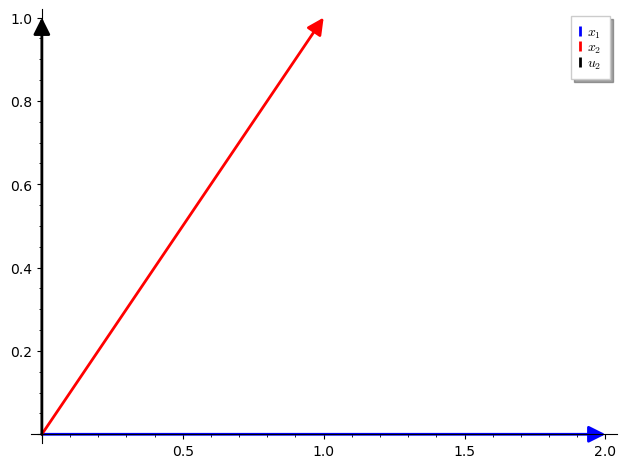

In [6]:
# Plot 2d arrows
arrow2d((0,0), (2,0), legend_label='$x_1$', legend_color='black') + \
arrow2d((0,0), (1,1), legend_label='$x_2$', legend_color='black', color = "red") + \
arrow2d((0,0), (0,1), legend_label='$u_2$', legend_color='black', color = "black")

In [7]:
# Projections
# Project each one of the vectors onto vector r.

r = vector([1,1,1])/sqrt(3.)
print ("Vector r:", r)
print ()

for i in range(3) :
    print ("Coordinate λ = ", r*m[i])

Vector r: (0.577350269189626, 0.577350269189626, 0.577350269189626)

Coordinate λ =  -0.362164420442106
Coordinate λ =  0.599528546346024
Coordinate λ =  -0.366485940513114


In [8]:
# We could also use a more compact command using an implicit for loop 
# Create a list containing the projection of each vector of m onto vector r.
projections = [r.dot_product(x) for x in m]; projections

[-0.362164420442106, 0.599528546346024, -0.366485940513114, -0.300942887535230]

### Find the projection matrix $P\pi$ onto the line through the origin spanned by b = $[1, 2, 2]^T$. b is a direction and a basis of the one-dimensional subspace (line through origin).

In [9]:
b = vector([1,2,2]).column()
b

[1]
[2]
[2]

In [32]:
bNorm = norm(b)
print ("|b| =", bNorm)
print ()

bTb = b.transpose()*b

print ("      bTb", bTb, type(bTb))
print ("   bTb[0]", bTb[0],type(bTb[0]))
print ("bTb[0][0]", bTb[0][0], type(bTb[0][0]))
print ()
#
Ppi = b*b.transpose()/bTb[0][0] # bTb[0][0] = bNorm^2
print ("Ppi")
print (Ppi)

|b| = 3.0

      bTb [9] <class 'sage.matrix.matrix_integer_dense.Matrix_integer_dense'>
   bTb[0] (9) <class 'sage.modules.vector_integer_dense.Vector_integer_dense'>
bTb[0][0] 9 <class 'sage.rings.integer.Integer'>

Ppi
[1/9 2/9 2/9]
[2/9 4/9 4/9]
[2/9 4/9 4/9]


### The projection $\pi_U(\vec{x})$ of $\vec{x} = [1,1,1]^T$ onto the line through the origin spanned by $\vec{b}$ is:

In [33]:
x = vector([1,1,1]).column()
print(x)

[1]
[1]
[1]


In [12]:
Ppi*x

[ 5/9]
[10/9]
[10/9]

In [13]:
show("Is invertible = ", Ppi.is_invertible(), " Det(Ppi) = ", Ppi.determinant())
show("Is symmetric = ", Ppi.is_symmetric())
show("Is the same as its transpose = ", Ppi.transpose() == Ppi)
show("Is the same as its square = ", Ppi*Ppi == Ppi)

'Is invertible = ' False ' Det(Ppi) = ' 0

'Is symmetric = ' True

'Is the same as its transpose = ' True

'Is the same as its square = ' True

In [14]:
def generalized_inner_product(x,A,y):
    if A.dimensions()[0] != A.dimensions()[1]:
        return 'No symmetric matrix is provided'
    elif A.is_positive_definite() == False:
        return 'No psd matrix is provided'
    else:
        return x * A * y.column()

In [15]:
x = vector([4,1])
y = vector([3,1])

print('Dot product of x,y: ', x.inner_product(y))

A = matrix([[7,0],[0,1]])

a = generalized_inner_product(x,A,y)

if type(a)=='str':
    print(a)
else:
    print('Generalized inner product of x,y: ', a)

Dot product of x,y:  13
Generalized inner product of x,y:  (85)


In [16]:
# Check the orthogonality between two vectors.
b1 = vector([1,1,1])
b1 = b1.column()

b2 = vector([-2,1,1])
b2 = b2.column()

print ("Inner product (b1,b2):", b1.transpose()*b2)

Inner product (b1,b2): [0]


### Gram-Schmidt orthogonalization
Documantation : https://doc.sagemath.org/html/en/reference/matrices/sage/matrix/matrix2.html#sage.matrix.matrix2.Matrix.gram_schmidt
    

In [17]:
nonOrthogonalBasis = matrix([[2,0],[1,1]])
b1, b2 = nonOrthogonalBasis
print ("u1:", b1)
print ("u2:", b2)
print ("b1.dot_product(b2):", b1.dot_product(b2))

u1: (2, 0)
u2: (1, 1)
b1.dot_product(b2): 2


In [18]:
# Gram-Schmidt orthogonalization
orthogonalBasis, s = nonOrthogonalBasis.gram_schmidt()
orthogonalBasis

[2 0]
[0 1]

In [19]:
# Check the orthogonality of the new basis
u1, u2 = orthogonalBasis

print ("u1:", u1)
print ("u2:", u2)
print ("u1.dot_product(u2):", u1.dot_product(u2))

u1: (2, 0)
u2: (0, 1)
u1.dot_product(u2): 0


In [20]:
# Create a rotation matrix.
def R(thetaRads):
    return matrix([[cos(thetaRads), -sin(thetaRads)], [sin(thetaRads), cos(thetaRads)]])

In [21]:
# Convert degrees into rads.
def degreesToRads(theta):
    return pi*theta/180.0

# Convert rads into degrees.
def radsToDegrees(thetaRads):
    return (180*thetaRads/pi).n()

In [22]:
radsToDegrees(pi/4)

45.0000000000000

In [23]:
# Calculate the angle between two vectors
def angle(x1,x2):
    normalizedInnerProd = x1.column().transpose()*x2.column()/norm(x1)/norm(x2)
    return radsToDegrees(arccos(normalizedInnerProd[0][0]))

In [24]:
x = vector([1,0])

In [25]:
y = vector([0,1])

In [26]:
print (angle(x,y))

90.0000000000000


In [27]:
# Rotate vector x by 90 degrees
R(pi/2)*x

(0, 1)

In [28]:
(R(degreesToRads(45))*x).n()

(0.707106781186548, 0.707106781186547)

In [29]:
x.inner_product(y)

0

## Quadratic forms

In [30]:
x,y=var('x,y')
X=vector(SR,[x,y])
A=matrix(SR,[[1,3],[3,4]])
(X*A*X).expand()

x^2 + 6*x*y + 4*y^2